<a href="https://colab.research.google.com/github/DavorJordacevic/TensorFlow-Keras-Neural-Networks/blob/master/Shallow%20Neural%20Network%20with%20tf.keras'circles%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

# Shallow neural network with Keras

Author: Davor Jordačević

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 

# 0. We will start with importing the required Python libraries.

In [0]:
import warnings
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

# 1. Create an artificial dataset

### 1.1 Fix random seed for reproducibility

In [0]:
seed = 7
np.random.seed(seed)

### 1.2 We need to generate two sets of data

In [0]:
# The first way is by using the already existing functions:
X,y = make_circles(n_samples = 3000, noise = 0.08, factor=0.3)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(3000, 2)
(3000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
# The other way is by hand:
X0 = [X[i,:] for i in range(len(y)) if y[i] == 0] # returns the row where the corresponding label is 0
X1 = [X[i,:] for i in range(len(y)) if y[i] == 1] # returns the row where the corresponding label is 1
            
X0_np = np.array(X0) # convert it into an array
X1_np = np.array(X1) 

X0_train = X0_np[:1000,:].T # picked the first 1000 samples in the second axis
X0_test = X0_np[1000:,:].T # picked the remaining 500 samples in the second axis

X1_train = X1_np[:1000,:].T  # picked the first 1000 samples in the second axis
X1_test = X1_np[1000:,:].T # picked the remaining 500 samples in the second axis

X_train = np.hstack([X0_train,X1_train]).T # all training examples
y_train=np.zeros((1,2000))
y_train[0, 1000:] = 1

X_test = np.hstack([X0_test,X1_test]).T # all test examples
y_test=np.zeros((1,1000))
y_test[0, 500:] = 1

### 1.3 Data visualization

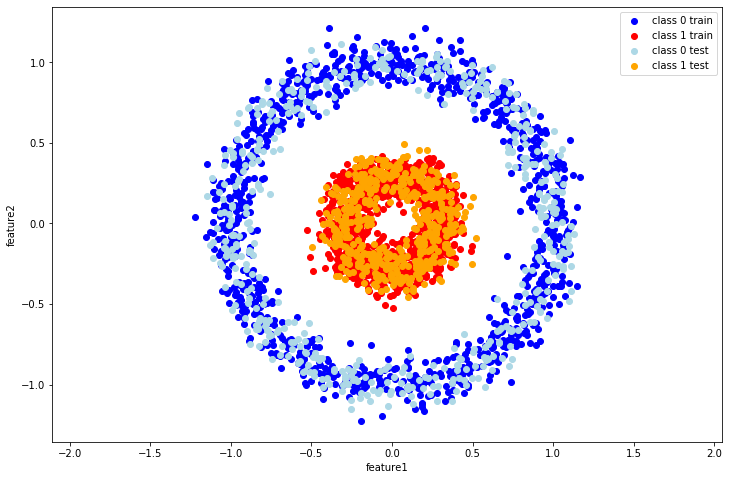

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(X0_train[0,:],X0_train[1,:], color = 'b', label = 'class 0 train')
plt.scatter(X1_train[0,:],X1_train[1,:], color = 'r',  label = 'class 1 train')
plt.scatter(X0_test[0,:],X0_test[1,:], color = 'LightBlue', label = 'class 0 test')
plt.scatter(X1_test[0,:],X1_test[1,:], color = 'Orange', label = 'class 1 test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

### 1.4 Checking the shape of the input data

In [0]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(2000, 2)
y_train:	(1, 2000)
x_test:		(1000, 2)
y_test:		(1, 1000)


# 2. Implementing a Neural Network

### 2.1 Hyperparameters

In [0]:
# Hyperparameters
training_epochs = 50 # Total number of training epochs
learning_rate = 0.001 # The learning rate

### 2.1 Creating a model

Our model will have 2 layers, with 8 neurons in the input layer, and one neuron in the output layer.
We will use normal initializer that generates tensors with a normal distribution.

The optimizer we'll use is SGD (stochastic gradient descent). Default parameters follow those provided in the original paper. 

To make this work in Keras we need to compile a model. An important choice to make is the loss function. We use the binary_crossentropy loss and not the usual in multi-class classification used categorical_crossentropy loss. This might seem unreasonable, but we want to penalize each output node independantly. So we pick a binary loss and model the output of the network as a independent bernoulli distributions per label.

In [0]:
# create a model
def create_model():
  model = tf.keras.Sequential()
  # Input layer
  model.add(tf.keras.layers.Dense(8, input_dim=2, kernel_initializer='uniform', activation='relu'))
  # Output layer
  model.add(tf.keras.layers.Dense(y_train.T.shape[1], activation='sigmoid'))
 
  # Compile a model
  model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate), 
                metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


### 2.2 Train the model

Let's trains the model for a given number of epochs.

In [0]:
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 validation_data = (X_test, y_test.T),
 verbose = 0
)

### 2.3 Test the model

The model can generate output predictions for the input samples.

In [0]:
prediction_values = model.predict_classes(X_test)

### 2.4 Accuracy

Test-Accuracy :

In [0]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 98.23%


### 2.5 Evaluate the model to see the accuracy

Now we can check the accuracy of our model

In [0]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
2000/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### 2.6 Summarize history for accuracy

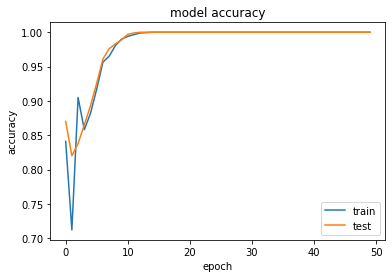

In [0]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

### 2.7 Summarize history for loss

Maximum Loss : 0.6873

Minimum Loss : 0.0363

Loss difference : 0.6510


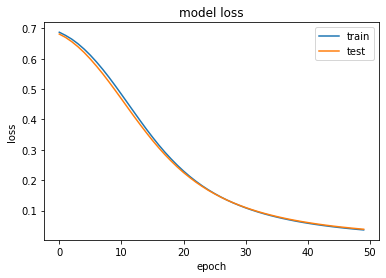

In [0]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# 3. Visualization

### 3.1 Visualization of the model predictions on our training set

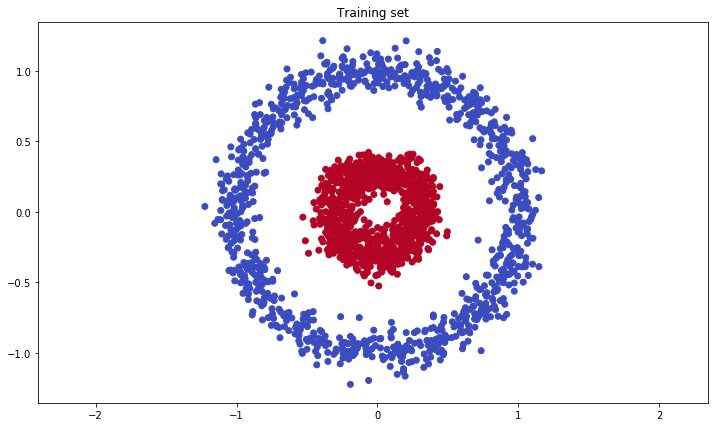

In [0]:
plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train[0,:] ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

### 3.2 Visualization of the model predictions on our test set

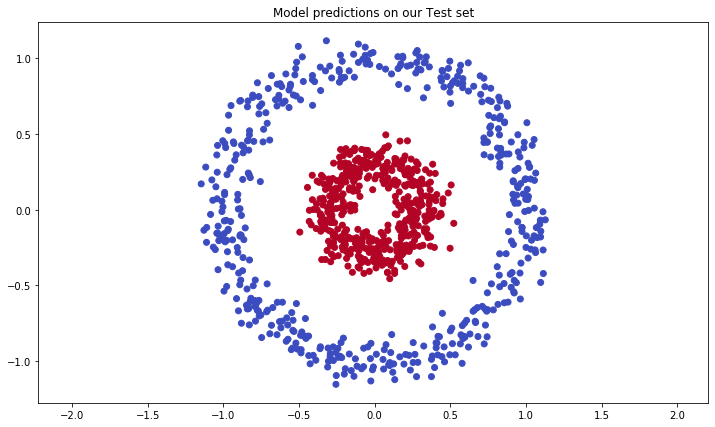

In [0]:
plt.figure(figsize =(12,7))
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

We can now see how our model separates the classes.

Text(0.5, 1.0, 'Model predictions on our Test set')

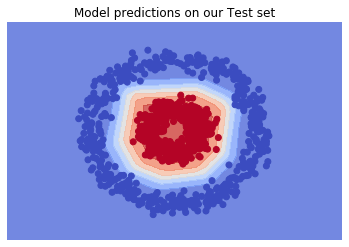

In [0]:
xx = np.linspace(-2, 2, 40)
yy = np.linspace(-1.5, 1.5, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-2, 2])
axes.set_ylim([-1.5, 1.5])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')

### 3.3 Display the weights and biases of our model

In [0]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)


# Output layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nOutput layer weights",weights1.shape,":\n",weights1)
print("Output layer biases",biases1.shape,":\n",biases1)

Input layer weights (2, 8) :
 [[ 1.4024773   1.6771686   0.4526758  -0.7248108   2.1644123   0.4484029
  -1.9204645   0.43192983]
 [ 1.9823891  -1.9983644  -0.0684137   2.0999298  -0.72045314 -0.05830906
  -1.4142427  -0.06964206]]
Input layer biases (8,) :
 [-0.21395567 -0.19256969  0.91954404 -0.16190813 -0.16392274  0.90343356
 -0.18384308  0.8711451 ]

Output layer weights (8, 1) :
 [[-2.8148358]
 [-2.6402607]
 [ 1.8151066]
 [-2.8321366]
 [-2.7704375]
 [ 1.8623364]
 [-3.23307  ]
 [ 2.012426 ]]
Output layer biases (1,) :
 [0.6438548]


### 3.4 Activation functions

ReLu - Rectified Linear unit is the default choice of activation functions in the hidden layer. In the output layer, we use Sigmoid as activation function, because its output is in the range between 0 and 1.

By using ReLu in the hidden layer, the Neural Network will learn much faster then using sigmoid or tanah, because the slope of sigmoid and tanh is going to be 0 if z is large positive or negative number and it slow down gradient descent. The derivative of ReLu is 1 if z>0.

First we should define them:

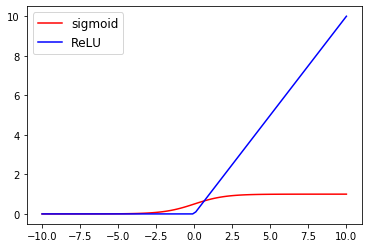

In [0]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def ReLU(z):
    return np.maximum(0,z)
  
z = np.linspace(-10,10,100)
plt.plot(z, sigmoid(z),'r', label = 'sigmoid')
plt.plot(z, ReLU(z),'b',label ='ReLU')
plt.legend(fontsize=12)

### 3.5 Compute the output of each neuron in our network

Compute the output of each neuron in our network, step by step.

For more about neural networks, you can visit http://datahacker.rs/neural_networks_representation/.

In [0]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
x3 = np.linspace(-1,1,50*50)

result = np.zeros((50*50,3)) 

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))
out15 = np.zeros((50*50, 1))
out16 = np.zeros((50*50, 1))
out17 = np.zeros((50*50, 1))
out18 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))


for i in range(len(x1)):
  for j in range(len(x2 )):
    # Input layer
    n11 = x1[i] * weights0[0][0] + x2[j] * weights0[1][0] + biases0[0]
    a11 = ReLU(n11)

    n12 = x1[i] * weights0[0][1] + x2[j] * weights0[1][1] + biases0[1]
    a12 = ReLU(n12)
    
    n13 = x1[i] * weights0[0][2] + x2[j] * weights0[1][2] + biases0[2]
    a13 = ReLU(n13)
    
    n14 = x1[i] * weights0[0][3] + x2[j] * weights0[1][3] + biases0[3]
    a14 = ReLU(n14)
    
    n15 = x1[i] * weights0[0][4] + x2[j] * weights0[1][4] + biases0[4]
    a15 = ReLU(n15)
    
    n16 = x1[i] * weights0[0][5] + x2[j] * weights0[1][5] + biases0[5]
    a16 = ReLU(n16)
  
    n17 = x1[i] * weights0[0][6] + x2[j] * weights0[1][6] + biases0[6]
    a17 = ReLU(n17)

    n18 = x1[i] * weights0[0][7] + x2[j] * weights0[1][7] + biases0[7]
    a18 = ReLU(n18)

    # Output layer
    n21 = a11 *weights1[0][0] + a12 *weights1[1][0] + a13 * weights1[2][0] + \
          a14 *weights1[3][0] + a15 *weights1[4][0] + a16  *weights1[5][0] + \
          a17 *weights1[6][0] + a18 *weights1[7][0] + biases1[0]

    a21 = sigmoid(n21)

    
    result[i*50+j,0 ] = x1[i]
    result[i*50+j, 1] = x2[j]

    out11[i*50+j] = a11
    out12[i*50+j] = a12
    out13[i*50+j] = a13
    out14[i*50+j] = a14
    out15[i*50+j] = a15
    out16[i*50+j] = a16
    out17[i*50+j] = a17
    out18[i*50+j] = a18

    out21[i*50+j] = a21

### 3.6 Compute the output of each neuron in our network

Using the vectorization principle, we can simplify the previous equations:

In [0]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
x3 = np.linspace(-1,1,50*50)

result = np.zeros((50*50,3)) 

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))
out15 = np.zeros((50*50, 1))
out16 = np.zeros((50*50, 1))
out17 = np.zeros((50*50, 1))
out18 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))

for i in range(len(x1)):
  for j in range(len(x2 )):
    # Input layer
    n1 = np.dot(weights0[0],x1[i]) + np.dot(weights0[1],x1[j]) + biases0
    a1 = ReLU(n1)
    # Output layer
    n2 = np.dot(weights1[:,0],a1) + biases1
    a2 = sigmoid(n2)
    
    result[i*50+j,0 ] = x1[i]
    result[i*50+j, 1] = x2[j]

    out11[i*50+j] = a1[0]
    out12[i*50+j] = a1[1]
    out13[i*50+j] = a1[2]
    out14[i*50+j] = a1[3]
    out15[i*50+j] = a1[4]
    out16[i*50+j] = a1[5]
    out17[i*50+j] = a1[6]
    out18[i*50+j] = a1[7]

    out21[i*50+j] = a2

### 3.7 Plot the output of each neuron in the input layer

Now we can plot the output of each neuron in the input layer

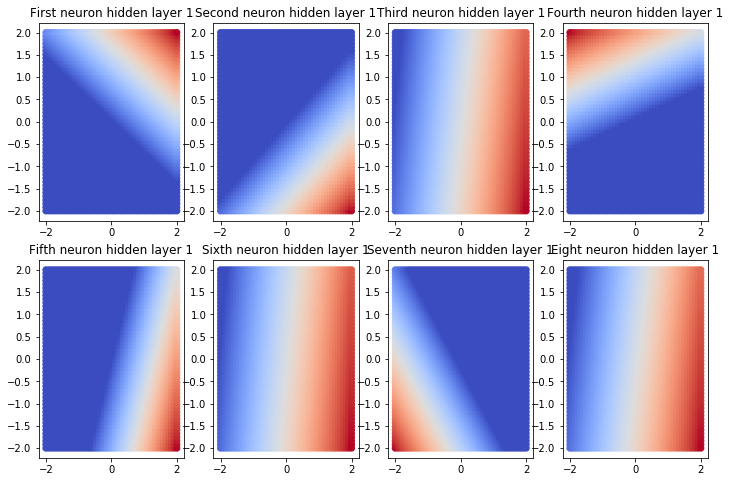

In [0]:
plt.figure(figsize =(12,8))

# First neuron, input layer
plt.subplot(241)
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out11.reshape(-1), cmap=cm.coolwarm)

# Second neuron, input layer
plt.subplot(242)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out12.reshape(-1), cmap=cm.coolwarm)

# Third neuron, input layer
plt.subplot(243)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out13.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, input layer
plt.subplot(244)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out14.reshape(-1), cmap=cm.coolwarm)

# Fifth neuron, input layer
plt.subplot(245)
plt.title('Fifth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out15.reshape(-1), cmap=cm.coolwarm)

# Sixth neuron, input layer
plt.subplot(246)
plt.title('Sixth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out16.reshape(-1), cmap=cm.coolwarm)

# Seventh neuron, input layer
plt.subplot(247)
plt.title('Seventh neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out17.reshape(-1), cmap=cm.coolwarm)

# Eight neuron, input layer
plt.subplot(248)
plt.title('Eight neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out18.reshape(-1), cmap=cm.coolwarm)

### 3.8 Output layer

In [0]:
# output layer
plt.title('Output layer')
plt.scatter(result[:, 0], result[:, 1], c= out21.reshape(-1), cmap=cm.coolwarm)

# 4. 3D visualization

### 4.1 3D visualization of our neural network input layer

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out11.reshape(-1), c=out11.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out12.reshape(-1), c=out12.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out13.reshape(-1), c=out13.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out14.reshape(-1), c=out14.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fourth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out15.reshape(-1), c=out15.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fifth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out16.reshape(-1), c=out16.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer sixth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out17.reshape(-1), c=out17.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer seventh neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out18.reshape(-1), c=out18.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer eight neuron')

### 4.2 3D visualization of our neural network output layer

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out21.reshape(-1), c=out21.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30,-45)
ax.set_title('3D visualization of our neural network output layer')

In [0]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=result[:,0], y=result[:,1], z=out21.reshape(-1), marker=dict(color=out21.reshape(-1)))])
fig.show()

In [0]:
import plotly.io as pio
pio.write_html(fig, file="index.html", auto_open=True)

For more informations, visit http://datahacker.rs/ .